<a href="https://colab.research.google.com/github/Chehan2004/DSGP_GROUP_36/blob/quality_assessment/Decision_trees_tea_leafs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = '/content/drive/MyDrive/Machine Learning/DSGP /coursework_python/second_training/tea_leaf_features_final.csv'

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(data)

In [9]:
df.columns

Index(['image_name', 'mean_green', 'green_red_ratio', 'texture_contrast',
       'defect_ratio', 'label'],
      dtype='object')

In [10]:
df.drop(columns=['image_name'], inplace=True)

In [11]:
df

,mean_green,green_red_ratio,texture_contrast,defect_ratio,label
0,171.17,1.01,6.28,0.0978,1
1,177.20,1.01,1.28,0.1548,1
2,176.28,1.01,5.76,0.0863,1
3,150.21,1.05,1.85,0.3107,1
4,159.18,1.04,1.21,0.2677,1
...,...,...,...,...,...
4100,33.77,1.12,2805.42,0.3245,0
4101,175.22,1.02,592.64,0.3591,0
4102,54.95,1.17,2842.19,0.3646,0
4103,42.32,1.27,2955.56,0.3702,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 2873 samples
Testing set size: 1232 samples


Now, let's train a Decision Tree Classifier on the training data.

In [13]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")

Decision Tree Classifier trained successfully!


Finally, let's evaluate the performance of the trained model on the test data.

In [14]:
# Make predictions on the test set
y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       368
           1       0.87      0.86      0.86       864

    accuracy                           0.81      1232
   macro avg       0.77      0.77      0.77      1232
weighted avg       0.81      0.81      0.81      1232



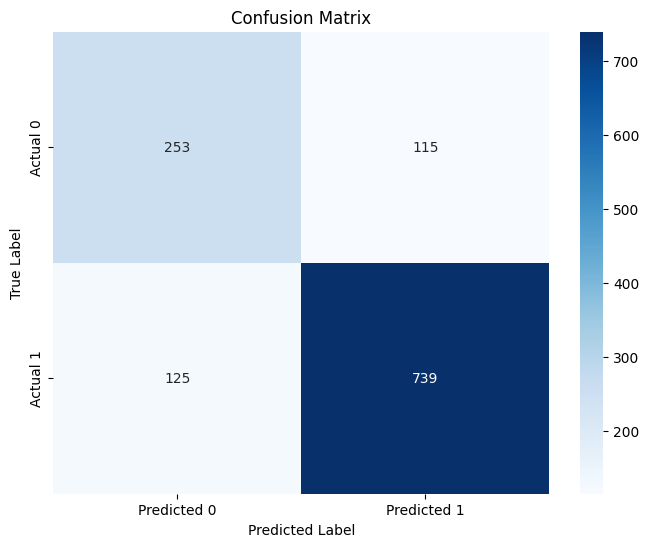

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()